In [85]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [86]:
# Lets bring in the total file

In [87]:
file = 'Total_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [88]:
path = os.path.join(location, file)

In [89]:
# bring in our dataframe

Total_df = pd.read_csv(path, index_col='PARCEL')
Total_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,PERSONAL REP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,0,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,0,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,0,0,0,0,0,0,0,0,0,0
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,0,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# split it into sales and non-sales versions

Total_Sellers_df = Total_df[Total_df['Did it sell?'] == 1]
Total_Sellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,PERSONAL REP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,0,0,0,0,0,0,0,0,0,0
5516023003,1,0,215 S St Andrews Pl,0,0,0,582687,466154,116533,0,...,0,0,0,0,0,0,0,0,0,0
5515023004,0,0,122 S Larchmont Blvd,0,0,0,732290,518993,213297,0,...,0,0,0,0,0,0,0,0,0,0
5523001002,0,0,640 N June St,0,0,0,950936,615024,335912,0,...,0,0,0,0,0,0,0,0,0,0
5515012004,0,0,105 S Arden Blvd,0,0,0,718038,545610,172428,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
Total_NonSellers_df = Total_df[Total_df['Did it sell?'] == 0]
Total_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,PERSONAL REP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,0,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,0,0,0,0,0,0,0,0,0,0
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,0,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,0,0,0,0,0,0,0,0,0,0
5516002020,1,0,223 S Irving Blvd,0,0,0,1167489,689700,477789,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Compare Assessed Total i.e 'ASSDTOTAL' in the dataframes

In [93]:
# create bins with even increments
bins_space = range(0,10000000,1000)

In [94]:
Total_Sellers_df['QUANTILEASSDTOTAL'] = pd.cut(Total_Sellers_df['ASSDTOTAL'], bins_space)
Total_NonSellers_df['QUANTILEASSDTOTAL'] = pd.cut(Total_NonSellers_df['ASSDTOTAL'], bins_space)

Total_NonSellers_df.head()

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,QUANTILEASSDTOTAL
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,0,0,0,0,0,0,0,0,0,"(2054000, 2055000]"
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,0,0,0,0,0,0,0,0,0,"(915000, 916000]"
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,0,0,0,0,0,0,0,0,0,"(2518000, 2519000]"
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,0,0,0,0,0,0,0,0,0,"(1428000, 1429000]"
5516002020,1,0,223 S Irving Blvd,0,0,0,1167489,689700,477789,0,...,0,0,0,0,0,0,0,0,0,"(1167000, 1168000]"


In [95]:
Total_Sellers_df['TAXAMT'][Total_Sellers_df['TAXAMT'] != 0].mean()

11953.649445350735

In [96]:
Total_Sellers_df['TAXAMT'].mean()

11601.167005739166

In [97]:
Total_Sellers_df['TAXAMT'][Total_Sellers_df['TAXAMT'] != 0].std()

13817.960770419379

In [98]:
Total_NonSellers_df['TAXAMT'][Total_NonSellers_df['TAXAMT'] != 0].mean()

10133.399039051745

In [99]:
Total_NonSellers_df['TAXAMT'][Total_NonSellers_df['TAXAMT'] != 0].std()

11401.006341868193

In [100]:
Total_NonSellers_df['TAXAMT'].mean()

9837.871012806654

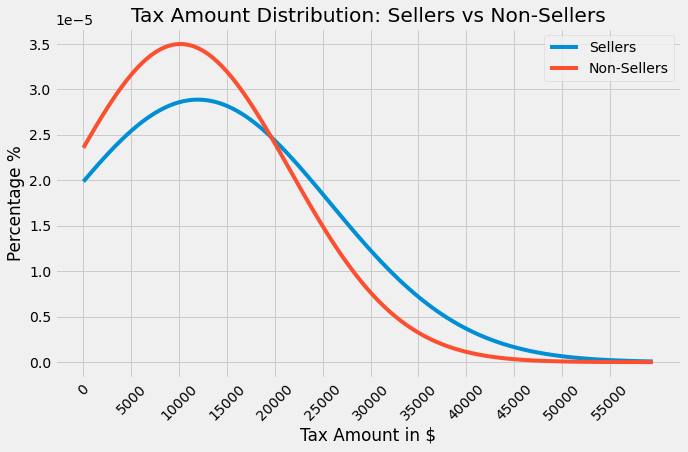

In [194]:
xtick_markers = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000]

x = np.arange(0, 60000, 500)
# create range of y-values that correspond to the normal pdf with mean = 0, and sd = 1
y = norm.pdf(x,11953, 13817)
q = norm.pdf(x,10133, 11401)
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x,y, label="seller")
ax.plot(x,q, label="non_seller")
#ax.set_sticks([-1000,0,1000])
ax.legend(['Sellers', 'Non-Sellers'])
ax.set_xticks(xtick_markers)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Tax Amount Distribution: Sellers vs Non-Sellers')
ax.set_xlabel('Tax Amount in $')
ax.set_ylabel('Percentage %')
plt.savefig('Tax_Amount.png')

In [102]:
# Now do assessed total 

Total_Sellers_df['ASSDTOTAL'][Total_Sellers_df['ASSDTOTAL'] != 0].mean()

977262.0439342965

In [103]:
Total_Sellers_df['ASSDTOTAL'][Total_Sellers_df['ASSDTOTAL'] != 0].std()

1140514.323627034

In [104]:
Total_NonSellers_df['ASSDTOTAL'][Total_NonSellers_df['ASSDTOTAL'] != 0].mean()

833009.405851772

In [105]:
Total_NonSellers_df['ASSDTOTAL'][Total_NonSellers_df['ASSDTOTAL'] != 0].std()

1184704.2215321637

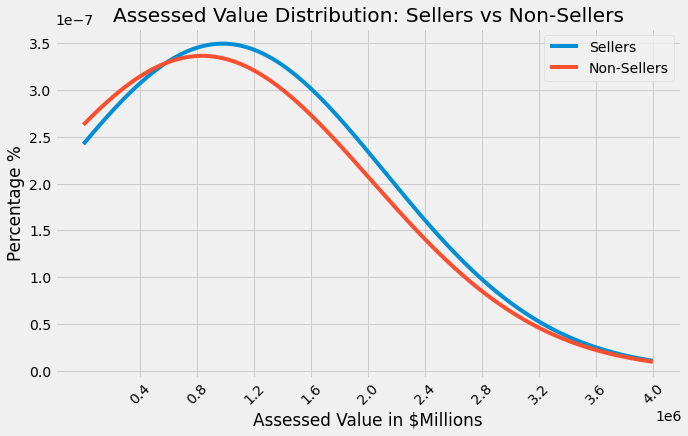

In [195]:
#xtick_markers = [500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000]
xtick_markers = [400000,
                 800000,
                1200000,
                1600000,
                2000000,
                2400000,
                2800000,
                3200000,
                3600000,
                4000000]

x = np.arange(0, 4000000, 1000)
# create range of y-values that correspond to the normal pdf with mean = 0, and sd = 1
y = norm.pdf(x,977262, 1140514)
q = norm.pdf(x,833009, 1184704)
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x,y, label="seller")
ax.plot(x,q, label="non_seller")
#ax.set_sticks([-1000,0,1000])
ax.legend(['Sellers', 'Non-Sellers'])
ax.set_xticks(xtick_markers)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Assessed Value Distribution: Sellers vs Non-Sellers')
ax.set_xlabel('Assessed Value in $Millions')
ax.set_ylabel('Percentage %')
plt.savefig('Assessed_Value.png')

In [132]:
# Now do loan amount total 

Total_Sellers_df['LOANAMOUT1'][Total_Sellers_df['LOANAMOUT1'] != 0].mean()

772414.2597354886

In [136]:
Total_Sellers_df['LOANAMOUT1'][Total_Sellers_df['LOANAMOUT1'] != 0].std()

880816.4438594123

In [134]:

Total_NonSellers_df['LOANAMOUT1'][Total_NonSellers_df['LOANAMOUT1'] != 0].mean()

641269.5488675529

In [137]:
Total_NonSellers_df['LOANAMOUT1'][Total_NonSellers_df['LOANAMOUT1'] != 0].std()

732453.8489046537

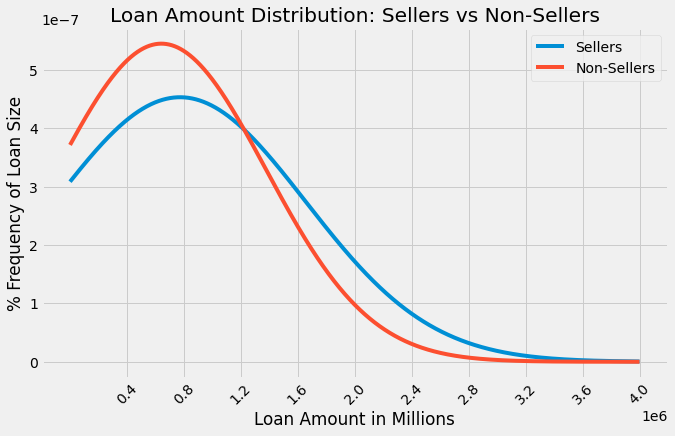

In [196]:
xtick_markers = [400000,
                 800000,
                1200000,
                1600000,
                2000000,
                2400000,
                2800000,
                3200000,
                3600000,
                4000000]

x = np.arange(0, 4000000, 1000)
# create range of y-values that correspond to the normal pdf with mean = 0, and sd = 1
y = norm.pdf(x,772414, 880816)
q = norm.pdf(x,641269, 732453)
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x,y, label="seller")
ax.plot(x,q, label="non_seller")
#ax.set_sticks([-1000,0,1000])
ax.legend(['Sellers', 'Non-Sellers'])
ax.set_xticks(xtick_markers)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Loan Amount Distribution: Sellers vs Non-Sellers')
ax.set_xlabel('Loan Amount in Millions')
ax.set_ylabel('% Frequency of Loan Size')
plt.savefig('Loan_Amount.png')

In [139]:
# Now to Property Size

Total_Sellers_df['TOTALSF'].mean()

1967.8078369285572

In [140]:
Total_Sellers_df['TOTALSF'].std()

1186.6798167209372

In [141]:
Total_NonSellers_df['TOTALSF'].mean()

2043.9562860584542

In [145]:
Total_NonSellers_df['TOTALSF'].std()

1946.8603948600523

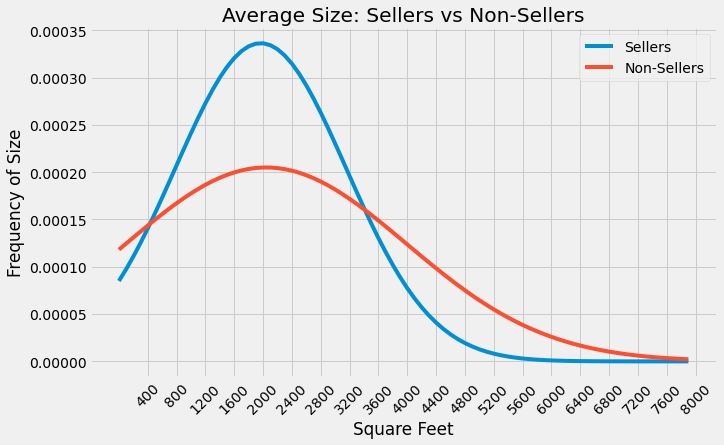

In [197]:
xtick_markers = [400,
                 800,
                1200,
                1600,
                2000,
                2400,
                2800,
                3200,
                3600,
                4000,4400,4800,5200,5600,6000,6400,6800,7200,7600,8000]

x = np.arange(0, 8000, 100)
# create range of y-values that correspond to the normal pdf with mean = 0, and sd = 1
y = norm.pdf(x,1967, 1186)
q = norm.pdf(x,2043, 1946)
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x,y, label="seller")
ax.plot(x,q, label="non_seller")
#ax.set_sticks([-1000,0,1000])
ax.legend(['Sellers', 'Non-Sellers'])
ax.set_xticks(xtick_markers)
#ax.set_xticklabels('$')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Average Size: Sellers vs Non-Sellers')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Frequency of Size')
plt.savefig('Average_Size.png')

In [172]:
# Now bin the entirety of each seller and non-seller group into 100 bins.
# Then chart the avg value of each bin

Total_Sellers_df['TAXAMT'].max()

484104.2

In [173]:
Total_NonSellers_df['TAXAMT'].max()

407861.25

In [184]:
# create our bins

bins_space = range(0,505000,5000)

In [ ]:
# create 100 bins based on tax amount
Total_Sellers_df['quantiletaxamt'] = pd.cut(Total_Sellers_df['TAXAMT'], bins_space)

# Make an Ogive chart